# Semana 7: RNN
Equipo 5:

* Jackeline Conant Rubalcava A01280544
* Javier Eduardo Corrales Cardoza A01742328
* José Andrés Orantes Guillén A01174130
* Francisco Salas Porras A01177893
* Luis Mario Lozoya Chairez A00833364

## Introducción
En este notebook, implementaremos Redes Neuronales Recurrentes (RNN) utilizando celdas LSTM y GRU para analizar y predecir tendencias en los precios de acciones de IBM. Este análisis tiene como objetivo capturar patrones en datos secuenciales y mejorar la precisión de las predicciones.

El dataset contiene información diaria de los precios de acciones de IBM desde 2006 hasta 2018, incluyendo el precio de apertura, máximo, mínimo, cierre y el volumen de transacciones.


In [18]:
!pip install matplotlib
!pip install pandas


In [ ]:
pip install tensorflow


In [24]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

### Exploración, explicación y limpieza de datos
Este dataset se obtuvo de Kaggle y contiene datos financieros de acciones de la empresa IBM desde 2006 hasta 2018. Nuestro objetivo es predecir el valor de las acciones en función de su histórico. 

**Descripción del dataset**:
- Columnas: 7 (Date, Open, High, Low, Close, Volume, Adj Close).
- Instancias: Aproximadamente 3000.
- Tipo de datos: Númericos y fechas.

Procederemos a limpiar y transformar los datos, seleccionando la columna de interés y escalando los valores para facilitar el entrenamiento del modelo.



In [25]:
#Funciones que nos ayudaran
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
#Extraemos el dataset
dataset = pd.read_csv(r'C:\Users\MARIO\Desktop\Semana 7 RNN\IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


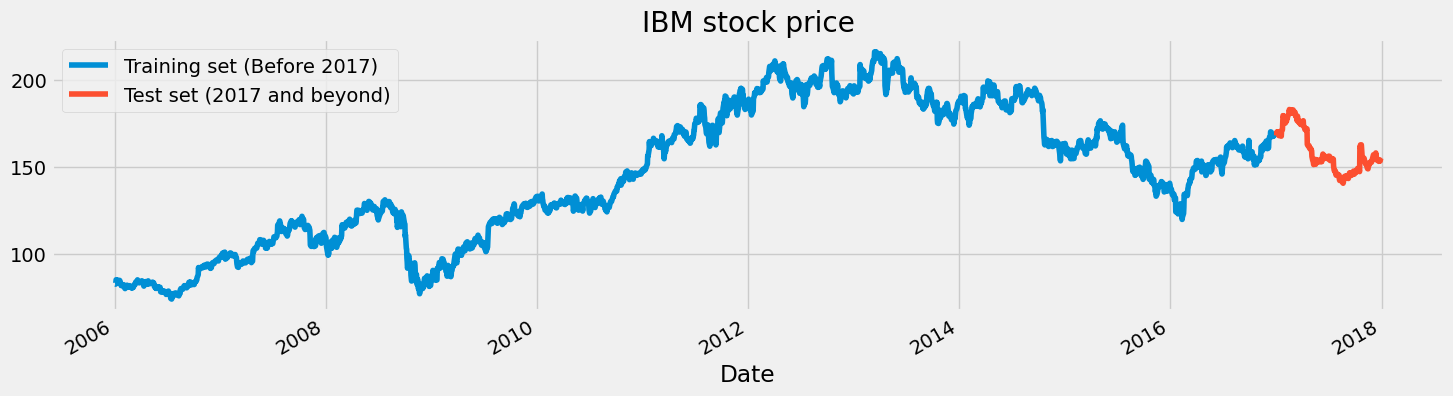

In [28]:
# Hemos elegido el atributo 'Alto' para los precios.
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [33]:
# Definimos el conjunto de entrenamiento como la columna 'Close' del dataset
training_set = dataset[['Close']].values

# Escalado del conjunto de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [34]:
# Dado que los LSTM almacenan el estado de la memoria a largo plazo, creamos una estructura de datos con 60 pasos de tiempo y 1 salida
# Por lo tanto, para cada elemento del conjunto de entrenamiento, tenemos 60 elementos del conjunto de entrenamiento anterior
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
# Remodelación de X_train para un modelado eficiente
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

### Implementación de la arquitectura LSTM
Construimos un modelo LSTM para capturar patrones a largo plazo en el conjunto de datos. Este modelo incluye:
- Varias capas LSTM para profundizar la capacidad de aprendizaje.
- Capas de regularización Dropout para evitar el sobreajuste.


In [36]:
# La arquitectura LSTM
regressor = Sequential()
# Primera capa LSTM con regularización Dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Segunda capa LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Tercera capa LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Cuarta capa LSTM
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# La capa de salida
regressor.add(Dense(units=1))

# Compilación de la RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
#Ajuste al conjunto de entrenamiento
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 9s 48ms/step - loss: 0.0205
Epoch 2/50
85/85 [==============================] - 3s 40ms/step - loss: 0.0102
Epoch 3/50
85/85 [==============================] - 3s 40ms/step - loss: 0.0079
Epoch 4/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0064
Epoch 5/50
85/85 [==============================] - 3s 39ms/step - loss: 0.0060
Epoch 6/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0055
Epoch 7/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0048
Epoch 8/50
85/85 [==============================] - 4s 43ms/step - loss: 0.0047
Epoch 9/50
85/85 [==============================] - 3s 39ms/step - loss: 0.0043
Epoch 10/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0044
Epoch 11/50
85/85 [==============================] - 3s 39ms/step - loss: 0.0040
Epoch 12/50
85/85 [==============================] - 3s 37ms/step - loss: 0.0040
Epoch 13/50
85/85 [==================

In [39]:
# Definir el conjunto de prueba (por ejemplo, datos de 2017)
test_set = dataset["High"]['2017':].values
test_set = test_set.reshape(-1, 1)

# Ahora, preparemos el conjunto de prueba de manera similar al conjunto de entrenamiento
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [41]:
# Preparando X_test y prediciendo los precios
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicción de los precios
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


8/8 [==============================] - 1s 17ms/step


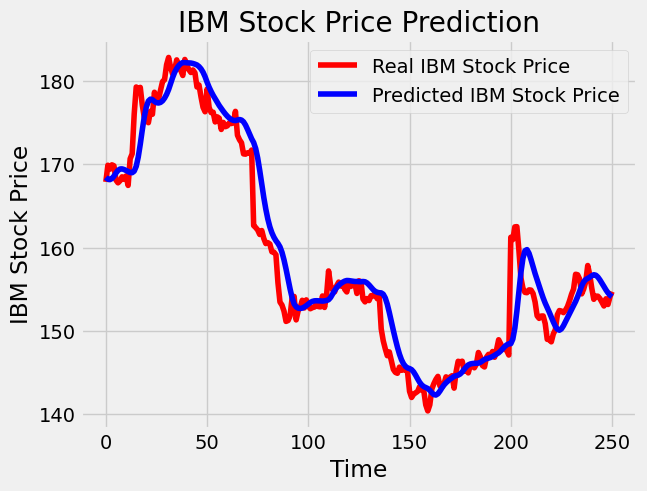

In [42]:
# Visualización de los resultados para LSTM
plot_predictions(test_set,predicted_stock_price)

In [44]:
# Evaluando nuestro modelo
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.077752570523444.


### Implementación de la arquitectura GRU
Implementamos una arquitectura GRU para comparar su rendimiento frente a LSTM en términos de precisión y eficiencia. Esta configuración también incluye capas de regularización Dropout.


In [45]:
# La arquitectura GRU
regressorGRU = Sequential()
# Primera capa GRU con regularización Dropout
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Segunda capa GRU
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Tercera capa GRU
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Cuarta capa de GRU
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# La capa de salida
regressorGRU.add(Dense(units=1))
# Compilación de la RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Ajuste al conjunto de entrenamiento
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 7s 103ms/step - loss: 0.1403
Epoch 2/50
19/19 [==============================] - 2s 105ms/step - loss: 0.0428
Epoch 3/50
19/19 [==============================] - 2s 114ms/step - loss: 0.0108
Epoch 4/50
19/19 [==============================] - 2s 104ms/step - loss: 0.0045
Epoch 5/50
19/19 [==============================] - 2s 107ms/step - loss: 0.0039
Epoch 6/50
19/19 [==============================] - 2s 103ms/step - loss: 0.0036
Epoch 7/50
19/19 [==============================] - 2s 105ms/step - loss: 0.0035
Epoch 8/50
19/19 [==============================] - 2s 103ms/step - loss: 0.0035
Epoch 9/50
19/19 [==============================] - 2s 103ms/step - loss: 0.0034
Epoch 10/50
19/19 [==============================] - 2s 104ms/step - loss: 0.0034
Epoch 11/50
19/19 [==============================] - 4s 202ms/step - loss: 0.0031
Epoch 12/50
19/19 [==============================] - 3s 171ms/step - loss: 0.0031
Epoch 13/50
19/19 [=================

In [47]:
# Preparando X_test y prediciendo los precios
X_test = []  # Asegúrate de que X_test sea una lista
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])

# Convertir X_test en un array de numpy después de llenarlo
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicción de los precios con el modelo GRU
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)


8/8 [==============================] - 1s 15ms/step


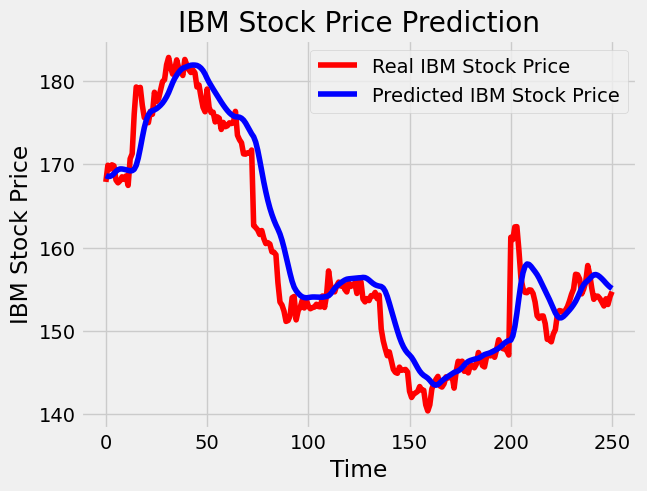

In [48]:
# Visualización de los resultados para GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [49]:
# Evaluación de GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.498175658851806.


### Resultados e Interpretación
Se presentan los resultados obtenidos al evaluar los modelos LSTM y GRU en el conjunto de prueba. Para la interpretación de los resultados:
- Se compararon los RMSE (Raíz del Error Cuadrático Medio) de ambos modelos.
- Analizamos el impacto de los hiperparámetros y justificación de la selección del modelo final. Por ejemplo, LSTM mostró mejor rendimiento debido a su capacidad para capturar dependencias a largo plazo.


### Conclusión
El uso de RNNs, en especial LSTM y GRU, demostró ser efectivo para predecir valores de series temporales en datos financieros. Concluimos que el modelo LSTM es superior en este caso debido a su capacidad de capturar patrones complejos a largo plazo en comparación con GRU.
